# Data Analysis Section

In [1]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")

print("Current Time is :", current_time)

Current Time is : 14:12:03


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = pd.read_csv('/content/drive/MyDrive/Global Terrorism/Terrorism Data.csv',encoding='latin-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
newdf=filename[["eventid","iyear","iday","success","attacktype1","targtype1","natlty1","weaptype1","nkill","extended","country","region",
          "latitude","longitude","specificity","vicinity","crit1","suicide","nperps"]]

In [6]:
dataSet = filename.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=False)
dataSet =dataSet[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataSet['casualities']=dataSet['Killed']+dataSet['Wounded']

dataSet.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [7]:
type(dataSet)

pandas.core.frame.DataFrame

In [8]:
dataSet.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [9]:
print('Country with Highest Terrorist Attacks:',dataSet['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',dataSet['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',dataSet['Killed'].max(),'that took place in',dataSet.loc[dataSet['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


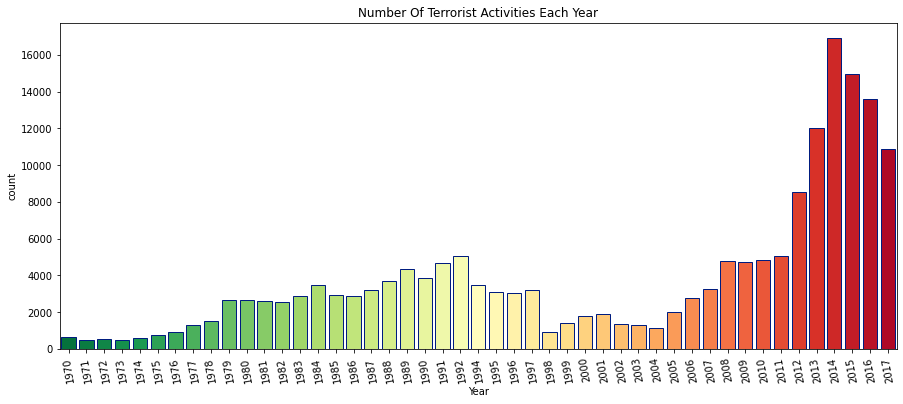

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=dataSet,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',1),dodge=False,saturation=1.75)
plt.xticks(rotation=100)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [11]:
max = (dataSet['Year']).value_counts()
print(max)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


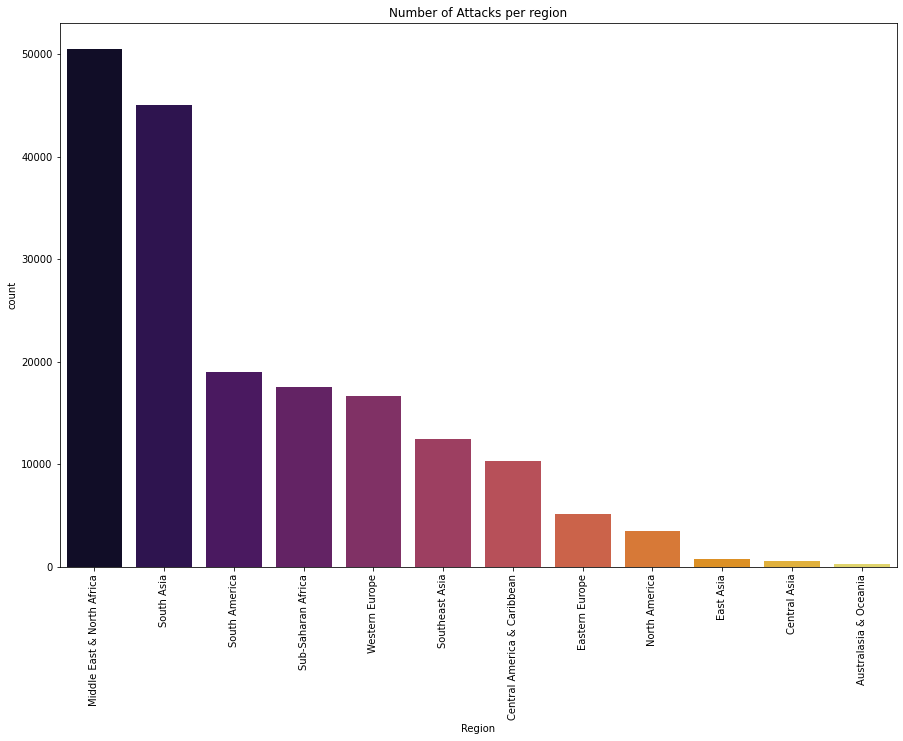

In [12]:
plt.subplots(figsize=(15,10))
sns.countplot('Region',data=dataSet,palette='inferno',order=dataSet['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Attacks per region')
plt.show()

In [13]:
max_region = ((dataSet['Region'])).value_counts()
print(max_region)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


In [14]:
data =newdf.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104040 entries, 1 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      104040 non-null  float64
 1   iyear        104040 non-null  int64  
 2   iday         104040 non-null  int64  
 3   success      104040 non-null  int64  
 4   attacktype1  104040 non-null  int64  
 5   targtype1    104040 non-null  int64  
 6   natlty1      104040 non-null  float64
 7   weaptype1    104040 non-null  int64  
 8   nkill        104040 non-null  float64
 9   extended     104040 non-null  int64  
 10  country      104040 non-null  int64  
 11  region       104040 non-null  int64  
 12  latitude     104040 non-null  float64
 13  longitude    104040 non-null  float64
 14  specificity  104040 non-null  float64
 15  vicinity     104040 non-null  int64  
 16  crit1        104040 non-null  int64  
 17  suicide      104040 non-null  int64  
 18  nperps       104040 non-

# Target Selection

In [16]:
def categorise(row):  
    if row['success'] == 0 and row['suicide'] == 0:
        return 0
    elif row['success'] == 1 and row['suicide'] == 0:
        return 2
    elif row['success'] == 1 and row['suicide'] == 1:
        return 1
    elif row['success'] == 0 and row['suicide'] == 1:
        return 3

In [17]:
def both_null(row):
  both_null = 1

  if row['success'] == 0 and row['suicide'] == 0:
    return both_null 
  
def only_success(row):
  only_success = 1


  if row['success'] == 1 and row['suicide'] == 0:
    return only_success 
  
def success(row):

  both = 1


  if row['success'] == 1 and row['suicide'] == 1:
    return both 

def only_suicide(row):

  only_suicide = 1


  if row['success'] == 0.0 and row['suicide'] == 1.0:
    return only_suicide 




In [18]:
data['Target'] = data.apply(lambda row: both_null(row), axis=1)
both_null = ((data['Target'])).sum()
both_null = (both_null/181692.0)*100.0


data['Target'] = data.apply(lambda row: only_success(row), axis=1)
only_success = ((data['Target'])).sum()
only_success = (only_success/181692.0)*100.0



data['Target'] = data.apply(lambda row: success(row), axis=1)
success = ((data['Target'])).sum()
success = (success/181692.0)*100.0

data['Target'] = data.apply(lambda row: only_suicide(row), axis=1)
only_suicide = ((data['Target'])).sum()
only_suicide = (only_suicide/181692.0)*100.0



print(both_null)
print(only_success)
print("print: "+str(success))
print("only_suicide  "+str(only_suicide))


<ipython-input-18-1871b15e361e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data.apply(lambda row: both_null(row), axis=1)
<ipython-input-18-1871b15e361e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data.apply(lambda row: only_success(row), axis=1)
<ipython-input-18-1871b15e361e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

7.127446447834797
46.79787772714264
print: 2.8278625366004007
only_suicide  0.5085529357374018


<ipython-input-18-1871b15e361e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data.apply(lambda row: only_suicide(row), axis=1)


In [19]:
dfChart = [["Unsuccessfull attack and not suicidal",both_null],["Successful attack but not suicidal",only_success],["Both successful attempt",success],["Unsuccessful attack but suicital attempt",only_suicide]]
dfChart = pd.DataFrame(dfChart, columns = ['Type', 'Ratio'])
dfChart

,Type,Ratio
0,Unsuccessfull attack and not suicidal,7.127446
1,Successful attack but not suicidal,46.797878
2,Both successful attempt,2.827863
3,Unsuccessful attack but suicital attempt,0.508553


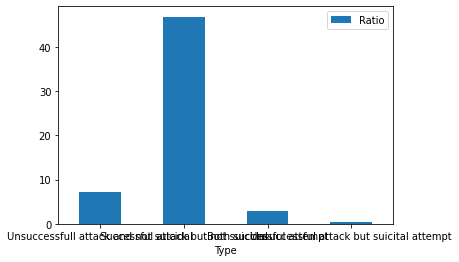

In [20]:
ax = dfChart.plot.bar(x='Type', y='Ratio', rot=0)


In [21]:
data['Target'] = data.apply(lambda row: categorise(row), axis=1)
data.head()

<ipython-input-21-7f3a7f2638b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data.apply(lambda row: categorise(row), axis=1)


,eventid,iyear,iday,success,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps,Target
1,1.970000e+11,1970,0,1,6,7,21.0,13,0.0,0,130,1,19.371887,-99.086624,1.0,0,1,0,7.0,2
5,1.970010e+11,1970,1,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,0,-99.0,2
6,1.970010e+11,1970,2,0,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,0,3.0,0
7,1.970010e+11,1970,2,1,3,21,217.0,6,0.0,0,217,1,37.791927,-122.225906,1.0,0,1,0,-99.0,2
8,1.970010e+11,1970,2,1,7,4,217.0,8,0.0,0,217,1,43.076592,-89.412488,1.0,0,1,0,1.0,2


# Initial Feature and Target Selection

In [22]:
s_drop = data[['success','suicide']]  
final_data = data.drop(s_drop,axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104040 entries, 1 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      104040 non-null  float64
 1   iyear        104040 non-null  int64  
 2   iday         104040 non-null  int64  
 3   attacktype1  104040 non-null  int64  
 4   targtype1    104040 non-null  int64  
 5   natlty1      104040 non-null  float64
 6   weaptype1    104040 non-null  int64  
 7   nkill        104040 non-null  float64
 8   extended     104040 non-null  int64  
 9   country      104040 non-null  int64  
 10  region       104040 non-null  int64  
 11  latitude     104040 non-null  float64
 12  longitude    104040 non-null  float64
 13  specificity  104040 non-null  float64
 14  vicinity     104040 non-null  int64  
 15  crit1        104040 non-null  int64  
 16  nperps       104040 non-null  float64
 17  Target       104040 non-null  int64  
dtypes: float64(7), int64(11)

In [23]:
X = final_data.drop(['Target'], axis=1, inplace=False)  
X

,eventid,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,nperps
1,1.970000e+11,1970,0,6,7,21.0,13,0.0,0,130,1,19.371887,-99.086624,1.0,0,1,7.0
5,1.970010e+11,1970,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,-99.0
6,1.970010e+11,1970,2,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,3.0
7,1.970010e+11,1970,2,3,21,217.0,6,0.0,0,217,1,37.791927,-122.225906,1.0,0,1,-99.0
8,1.970010e+11,1970,2,7,4,217.0,8,0.0,0,217,1,43.076592,-89.412488,1.0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,31,2,4,182.0,5,1.0,0,182,11,2.359673,45.385034,2.0,0,1,-99.0
181687,2.017120e+11,2017,31,3,4,167.0,6,2.0,0,200,10,35.407278,35.942679,1.0,1,1,-99.0
181688,2.017120e+11,2017,31,7,14,160.0,8,0.0,0,160,5,6.900742,124.437908,2.0,0,1,-99.0
181689,2.017120e+11,2017,31,3,2,92.0,6,0.0,0,92,6,24.798346,93.940430,1.0,0,1,-99.0


In [24]:
Y=final_data['Target']
Y

1         2
5         2
6         0
7         2
8         2
         ..
181686    2
181687    2
181688    2
181689    0
181690    0
Name: Target, Length: 104040, dtype: int64

# Features Engineering

In [25]:
X.corr()

,eventid,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,nperps
eventid,1.000000,0.999990,0.015654,0.038358,0.085942,-0.053981,-0.014213,0.006727,-0.009710,-0.080640,0.341630,0.070757,0.441154,0.103436,0.030908,0.015869,-0.136559
iyear,0.999990,1.000000,0.015632,0.038309,0.085921,-0.053977,-0.014272,0.006715,-0.009733,-0.080630,0.341588,0.070766,0.441139,0.103373,0.030943,0.015812,-0.136618
iday,0.015654,0.015632,1.000000,-0.000033,0.002347,-0.004543,0.000332,-0.005203,-0.002610,-0.004759,0.008759,0.011588,0.007759,0.006119,-0.001655,0.015399,-0.014965
attacktype1,0.038358,0.038309,-0.000033,1.000000,0.032642,0.010553,0.709380,0.015477,0.256022,0.004389,-0.044420,0.001616,-0.042698,0.068175,0.009880,0.010507,0.013631
targtype1,0.085942,0.085921,0.002347,0.032642,1.000000,-0.009929,0.017258,-0.000171,0.005496,0.032884,0.070602,0.017710,0.001245,0.001649,0.011805,-0.015038,-0.008863
natlty1,-0.053981,-0.053977,-0.004543,0.010553,-0.009929,1.000000,-0.013707,0.011901,0.004526,0.696216,0.081823,-0.144390,-0.023853,-0.044628,0.013877,-0.016351,0.001994
weaptype1,-0.014213,-0.014272,0.000332,0.709380,0.017258,-0.013707,1.000000,0.016854,0.186061,-0.007725,-0.009918,-0.004923,-0.050202,0.070673,0.011531,0.017819,0.010273
nkill,0.006727,0.006715,-0.005203,0.015477,-0.000171,0.011901,0.016854,1.000000,0.039216,-0.000668,0.056981,-0.011186,-0.026882,0.003412,-0.000092,0.010967,0.023653
extended,-0.009710,-0.009733,-0.002610,0.256022,0.005496,0.004526,0.186061,0.039216,1.000000,-0.011694,-0.018654,-0.060321,-0.010474,0.047172,0.017069,-0.019506,0.001826
country,-0.080640,-0.080630,-0.004759,0.004389,0.032884,0.696216,-0.007725,-0.000668,-0.011694,1.000000,0.091961,-0.038613,-0.078389,-0.087940,0.001743,-0.022009,0.000869


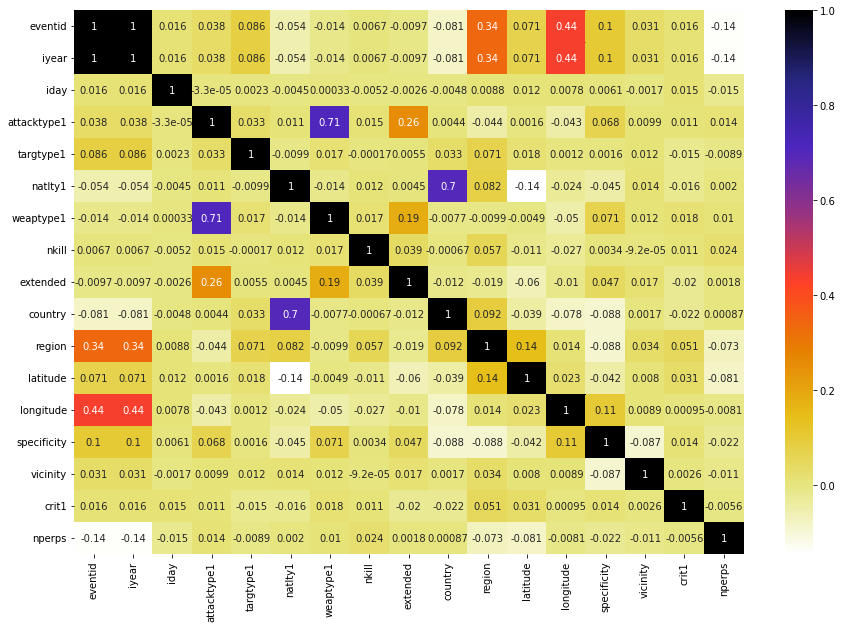

In [26]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [27]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

1

In [29]:
corr_features

{'iyear'}

In [30]:
X = X.drop(corr_features,axis=1)

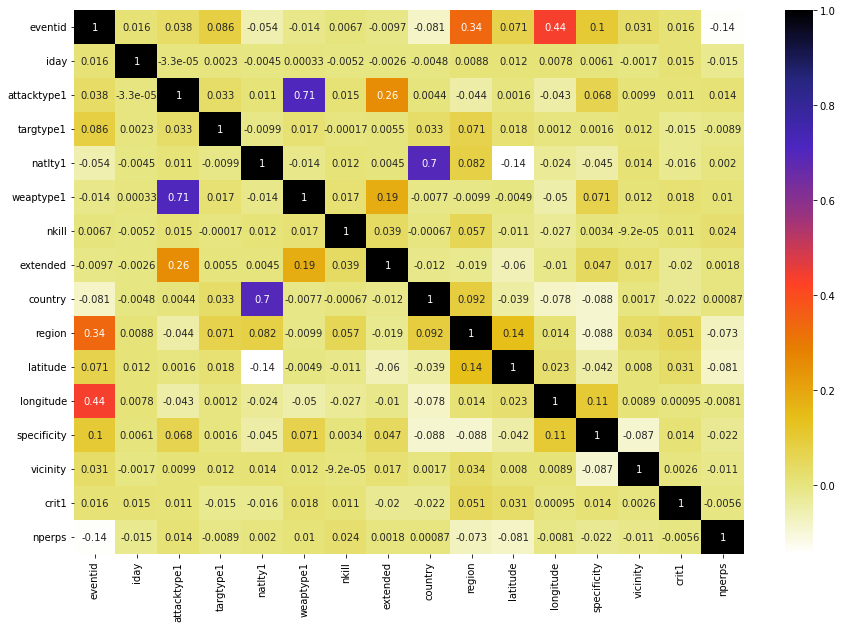

In [31]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Balance

In [32]:
Y.value_counts()

2    85028
0    12950
1     5138
3      924
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdb8a2b4ca0>,
 [Text(-0.9236576168248546, 0.5973747625079506, ''),
  Text(0.7994876967777946, -0.7555259245723718, ''),
  Text(1.075615838828003, -0.23032708755665604, ''),
  Text(1.0995718680265583, -0.030687245633740375, '')],
 [Text(-0.5038132455408297, 0.3258407795497912, '81.73'),
  Text(0.43608419824243344, -0.41210504976674817, '12.45'),
  Text(0.586699548451638, -0.1256329568490851, '4.94'),
  Text(0.5997664734690317, -0.01673849761840384, '0.89')])

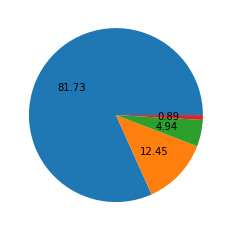

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie(Y.value_counts() , autopct = '%.2f')

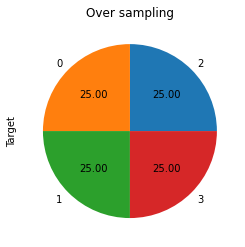

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X = np.array(X)
x, y = ros.fit_resample(X,Y)

ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over sampling")

In [35]:
y.value_counts()

2    85028
0    85028
1    85028
3    85028
Name: Target, dtype: int64

# Different Machine Learning Algorithms

# Random Forest

In [36]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( x, y, test_size = 0.3, random_state = 42)

In [37]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

In [38]:
# use the model to make predictions with the test data
y_pred_RF = clf.predict(X_test_RF)

In [39]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})

In [40]:
final_model_predictions_RF.head()

,Actual,predictions
289063,3,3
232952,1,1
289945,3,3
169634,0,0
8813,2,2


In [41]:
# how did our model perform?
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))

Misclassified samples: 1499
Accuracy: 0.9853


In [42]:
y_pred_prob = clf.predict_proba(X_test_RF)  # 2  columns for probability it is creating

In [43]:
y_pred_prob = clf.predict_proba(X_test_RF)[:,1]   # The first index refers to the probability that the data belong to class 0, and the second refers to the probabilit

In [44]:
final_model_predictions_RF['Predicted_prob'] = y_pred_prob

In [45]:
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
289063,3,3,0.0
232952,1,1,1.0
289945,3,3,0.0
169634,0,0,0.0
8813,2,2,0.0


In [46]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib 

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

Using matplotlib backend: agg


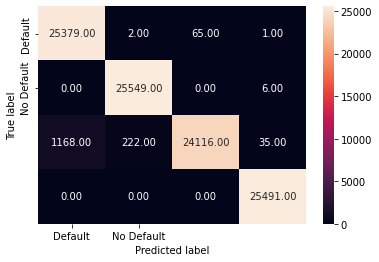

In [47]:
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )   # correct 0 is sensitivity and correct is specificity

In [48]:
accuracy_RF=np.round( metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  ),2)*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions,pos_label='positive',
                                           average='micro')
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions,pos_label='positive',
                                           average='micro')
print('Precision :',precision_RF)

Total Accuracy :  99.00
recall : 0.9853088186290844
Precision : 0.9853088186290844


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [49]:
F1_RF = 2 * (precision_RF * recall_RF) / (precision_RF + recall_RF)
F1_RF

0.9853088186290844

# Support Vector Machine

In [50]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")

print("Current Time is :", current_time)

Current Time is : 14:13:46


In [51]:
# X = pd.DataFrame(x, columns = ['Column_A','Column_B','Column_C'])

In [52]:
# X = x.head(500)
# Y = y.head(500)

In [53]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split(  x, y, test_size = 0.3, random_state = 100)

In [54]:
# # Support Vector Machine
# from sklearn.svm import SVC
# model = SVC()

# model.fit(X_train,y_train)

# print("Accuracy using Support Vector Machine :",model.score(X_test,y_test))

from sklearn.svm import SVC # "Support Vector Classifier" 
clfsvm = SVC(kernel='linear') 

In [ ]:
# fitting x samples and y classes 
clfsvm.fit(X_train_SVC,y_train_SVC)

In [ ]:
y_pred_SVC=clfsvm.predict(X_test_SVC)

In [ ]:
final_model_predictions_SVC = pd.DataFrame({'Actual':y_test_SVC, 'predictions':y_pred_SVC})

In [ ]:
# how did our model perform?
count_misclassified = (y_test_SVC != y_pred_SVC).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_SVC = metrics.accuracy_score(y_test_SVC, y_pred_SVC)
print('Accuracy: {:.2f}'.format(accuracy_SVC))

In [ ]:
accuracy_svm =metrics.accuracy_score( final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions  )*100
accuracy_svm='{:.2f}'.format(accuracy_svm)
print( 'Total Accuracy : ',accuracy_svm)
recall_svm =metrics.recall_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('recall',recall_svm)
Precision_svm=metrics.precision_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('Precision',Precision_svm)

In [ ]:
F1_SVM = 2 * (Precision_svm * recall_svm) / (Precision_svm + recall_svm)
F1_SVM

In [ ]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")

print("Current Time is :", current_time)

# K Nearest Neighbor

In [ ]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_KNN)

X_train_knn = scaler.transform(X_train_KNN)
X_test_knn = scaler.transform(X_test_KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_knn, y_train_KNN)

In [ ]:
y_pred_knn = classifier.predict(X_test_knn)

In [ ]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

In [ ]:
draw_cm( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )   # correct 0 is sensitivity and correct is specificity

In [ ]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions,average='micro' )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions,average='micro' )
print('Precision',Precision_knn)

In [ ]:
F1_KNN = 2 * (Precision_knn * recall_knn) / (Precision_knn + recall_knn)
F1_KNN

# Decision Tree

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeClassifier 


In [ ]:
# create a regressor object 
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0) 

In [ ]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( x, y, test_size = 0.3, random_state = 100)

In [ ]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT) 

In [ ]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT) 

In [ ]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})
final_model_predictions_DT

In [ ]:
# how did our model perform?
count_misclassified = (y_test_DT != y_pred_DT).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_DT = np.round(metrics.accuracy_score(y_test_DT, y_pred_DT),1)*100
print( 'Total Accuracy : ',accuracy_DT)

In [ ]:
accuracy_DT=np.round( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ),1)*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

In [ ]:
F1_DT = 2 * (Precision_DT * recall_DT) / (Precision_DT + recall_DT)
F1_DT

In [ ]:
# define the tree depths to evaluate
values = [i for i in range(1, 30)]

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:

# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train_DT, y_train_DT)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_DT)
	train_acc = accuracy_score(y_train_DT, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_DT)
	test_acc = accuracy_score(y_test_DT, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

In [ ]:
from matplotlib import pyplot

In [ ]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
plt.figure(figsize=(100, 100))

# XG Boosting Classification

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_XG = XGBClassifier()

In [ ]:
X_train_XG, X_test_XG, y_train_XG, y_test_XG = train_test_split( x, y, test_size = 0.2, random_state = 42)

In [ ]:
model_XG.fit(X_train_XG, y_train_XG)

In [ ]:
y_pred_XG = model_XG.predict(X_test_XG)

In [ ]:
final_model_predictions_XG = pd.DataFrame({'Actual':y_test_XG, 'predictions':y_pred_XG})
final_model_predictions_XG

In [ ]:
count_misclassified = (y_test_XG != y_pred_XG).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_XG = metrics.accuracy_score(y_test_XG, y_pred_XG)
accuracy_XG='{:.3f}'.format(accuracy_XG)
accuracy_XG = float(accuracy_XG)*100
print("Accuracy :",accuracy_XG)

In [ ]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


cv_XG = KFold(n_splits=10, random_state=7, shuffle=True)
# evaluate model
scores_XG = cross_val_score(model_XG, x, y, scoring='accuracy', cv=cv_XG, n_jobs=-1)
scores_XG = mean(scores_XG)*100
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_XG), std(scores_XG)))

In [ ]:
accuracy_XG =np.round( metrics.accuracy_score( final_model_predictions_XG.Actual, final_model_predictions_XG.predictions),2)*100
accuracy_XG='{:.2f}'.format(accuracy_XG)
print( 'Total Accuracy : ',accuracy_XG )
recall_XG =metrics.recall_score(final_model_predictions_XG.Actual, final_model_predictions_XG.predictions,pos_label='positive',
                                           average='micro')
print('recall :',recall_XG)
precision_XG =metrics.precision_score(final_model_predictions_XG.Actual, final_model_predictions_XG.predictions,pos_label='positive',
                                           average='micro')
print('Precision :',precision_XG)

In [ ]:
F1_XG = 2 * (precision_XG * recall_XG) / (precision_XG + recall_XG)
F1_XG

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
X_train_GB, X_test_GB, y_train_GB, y_test_GB = train_test_split( x, y, test_size = 0.3, random_state = 42)

In [ ]:
gb.fit(X_train_GB,y_train_GB)

In [ ]:
y_pred_GB=gb.predict(X_test_GB)

In [ ]:
final_model_predictions_GB = pd.DataFrame({'Actual':y_test_GB, 'predictions':y_pred_GB})
final_model_predictions_GB

In [ ]:
count_misclassified = (y_test_GB != y_pred_GB).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_GB = metrics.accuracy_score(y_test_GB, y_pred_GB)
accuracy_GB='{:.3f}'.format(accuracy_GB)
accuracy_GB = float(accuracy_GB)*100
print("Accuracy :",accuracy_GB)

In [ ]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


cv_GB = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scores_GB = cross_val_score(gb, x, y, scoring='accuracy', cv=cv_GB, n_jobs=-1)
# scores_RF = np.round((mean(scores_RF),2)*100
scores_GB = np.round(mean(scores_GB),3)*100   
# report performance
scores_GB
#print('Accuracy Using Cross Validation: %.3f ' % (mean(scores_RF)),'%')

In [ ]:
accuracy_GB =np.round( metrics.accuracy_score( final_model_predictions_GB.Actual, final_model_predictions_GB.predictions  ),2)*100
accuracy_GB='{:.2f}'.format(accuracy_GB)
print( 'Total Accuracy : ',accuracy_GB )
recall_GB =metrics.recall_score(final_model_predictions_GB.Actual, final_model_predictions_GB.predictions,pos_label='positive',
                                           average='micro')
print('recall :',recall_GB)
precision_GB =metrics.precision_score(final_model_predictions_GB.Actual, final_model_predictions_GB.predictions,pos_label='positive',
                                           average='micro')
print('Precision :',precision_GB)

In [ ]:
F1_GB = 2 * (precision_GB * recall_GB) / (precision_GB + recall_GB)
F1_GB

In [ ]:
# define the tree depths to evaluate
valuesNB = [i for i in range(1, 20)]

In [ ]:
train_scoresNB, test_scoresNB = list(), list()

In [ ]:
...
# evaluate a decision tree for each depth
for i in valuesNB:
	# configure the model
	gb = GradientBoostingClassifier()
	# fit model on the training dataset
	gb.fit(X_train_GB, y_train_GB)
	# evaluate on the train dataset
	train_yhat = gb.predict(X_train_GB)
	train_acc = accuracy_score(y_train_GB, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_GB)
	test_acc = accuracy_score(y_test_GB, test_yhat)
	test_scoresNB.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

In [ ]:
# plot of train and test scores vs tree depth
pyplot.plot(valuesNB, train_scoresNB, '-o', label='Train')
pyplot.plot(valuesNB, test_scoresNB, '-o', label='Test')
pyplot.legend()
pyplot.show()

# Final Result

In [ ]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn, accuracy_DT,accuracy_XG,0,0],
                    "Recall":[recall_RF,recall_knn, recall_DT,recall_XG,0,0],
                    "Precision ":[precision_RF,Precision_knn, Precision_DT,precision_XG,0,0],
                    "F1 Score ":[F1_RF,F1_KNN, F1_DT,F1_XG,0,0]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm", "Decision Tree Classifier","Naive Bayes","Support Vector Classifier","Logistic Regression"])
table

In [ ]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")

print("Current Time is :", current_time)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

# print("Accuracy using Gaussian Algorithm is :",gnb.score(X_test,y_test))

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# ad = AdaBoostClassifier()

# ad.fit(X_train, y_train)

# print("Accuracy using ADA Boster Classifier Algorithm is :",ad.score(X_test,y_test))